In [8]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Decision Tree

In [9]:
games = pd.read_csv('games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


[Text(0.7623025887333116, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.454\nsamples = 8134\nvalue = [2839, 5295]\nclass = good'),
 Text(0.5520799413871703, 0.8636363636363636, 'K_cluster_3 <= 0.5\ngini = 0.445\nsamples = 7740\nvalue = [2592, 5148]\nclass = good'),
 Text(0.3564799739498535, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.459\nsamples = 6684\nvalue = [2385, 4299]\nclass = good'),
 Text(0.1955389124063823, 0.6818181818181818, 'discount_price <= 1.005\ngini = 0.444\nsamples = 4873\nvalue = [1621, 3252]\nclass = good'),
 Text(0.09671116900032563, 0.5909090909090909, 'discount_price <= 0.965\ngini = 0.474\nsamples = 1227\nvalue = [473, 754]\nclass = good'),
 Text(0.05307717355910127, 0.5, 'genre_Strategy <= 0.5\ngini = 0.458\nsamples = 947\nvalue = [337, 610]\nclass = good'),
 Text(0.030608922175187236, 0.4090909090909091, 'genre_Racing <= 0.5\ngini = 0.444\nsamples = 745\nvalue = [248, 497]\nclass = good'),
 Text(0.016932595245848257, 0.318181818

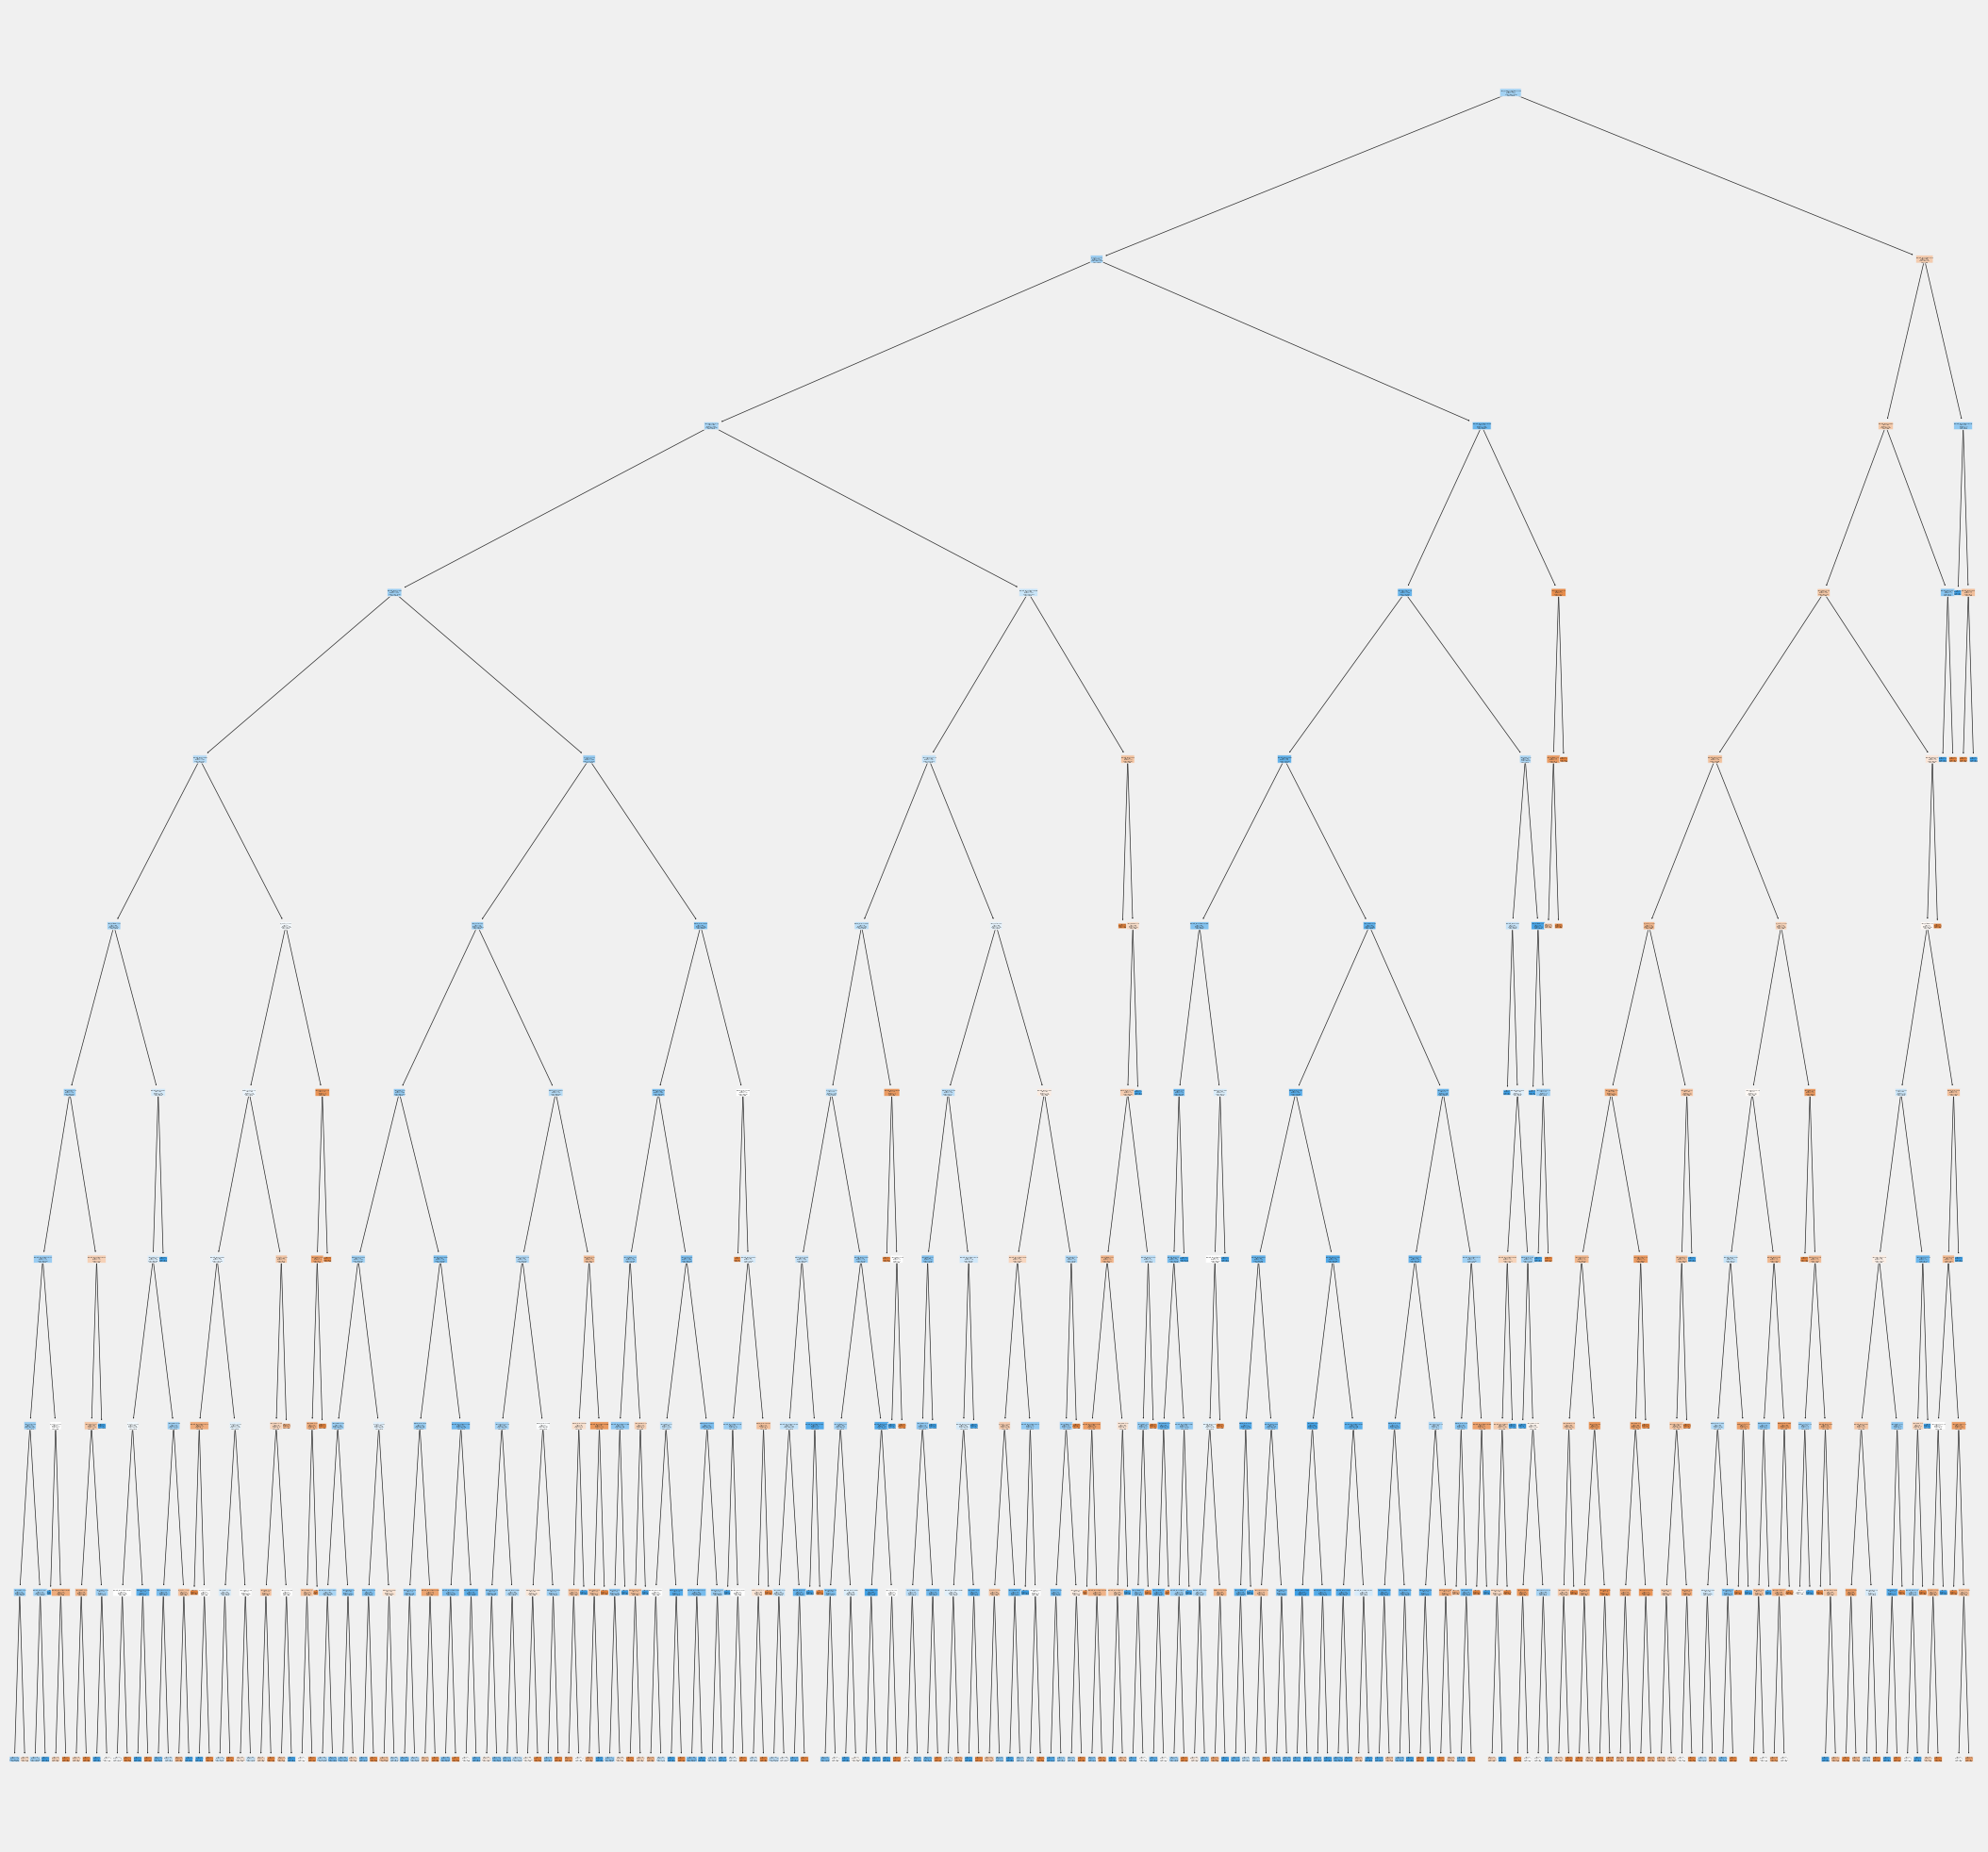

In [10]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.7030981067125646

TPR Train :	 0.9435316336166194
TNR Train :	 0.25466713631560406

FPR Train :	 0.7453328636843959
FNR Train :	 0.05646836638338055

Precision:	 0.7074363992172211
Recall   :	 0.25466713631560406
F1-score :	 0.37451437451437447


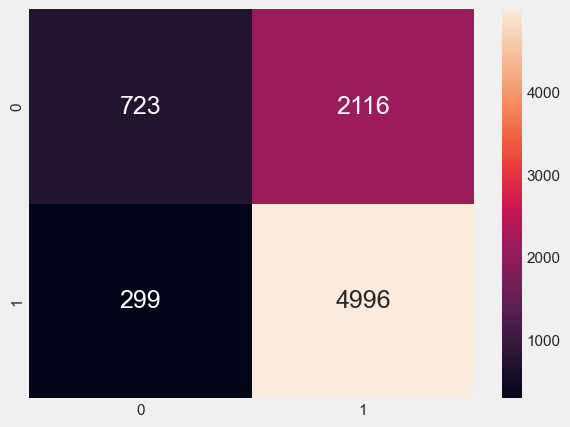

In [11]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6379804934021801

TPR Test :	 0.8917960088691796
TNR Test :	 0.17303005686433795

FPR Test :	 0.8269699431356621
FNR Test :	 0.1082039911308204

Precision:	 0.7074363992172211
Recall   :	 0.25466713631560406
F1-score :	 0.37451437451437447


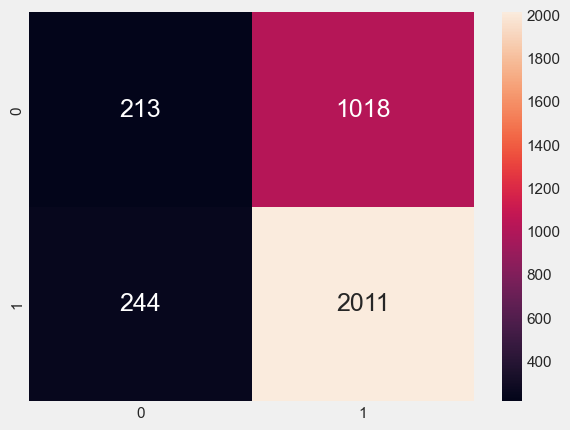

In [12]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

There is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is a direct effect of the large `Good` vs `Bad` class imbalance in the response variable `Status`. As `Status = Good` was more likely in the data, *False Positives* are more likely too. This class imbalance is important to resolve as we do not want a biased model. Going back to our problem stated, of idenitfying good/bad games, an important part is on identifying potential bad games as to not let consumers waste money on them. Thus the predicition of bad games is important.

# Decision Tree - Oversampling

In [13]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


[Text(0.6833256740196079, 0.9545454545454546, 'K_cluster_3 <= 0.5\ngini = 0.493\nsamples = 9513\nvalue = [4182, 5331]\nclass = good'),
 Text(0.45034849877450983, 0.8636363636363636, 'genre_Massively Multiplayer <= 0.5\ngini = 0.497\nsamples = 8369\nvalue = [3882, 4487]\nclass = good'),
 Text(0.2889859068627451, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.494\nsamples = 7822\nvalue = [3500, 4322]\nclass = good'),
 Text(0.17585784313725492, 0.6818181818181818, 'discount_price <= 93.4\ngini = 0.487\nsamples = 5657\nvalue = [2366, 3291]\nclass = good'),
 Text(0.1323529411764706, 0.5909090909090909, 'original_price <= 30.36\ngini = 0.487\nsamples = 5614\nvalue = [2361, 3253]\nclass = good'),
 Text(0.07107843137254902, 0.5, 'original_price <= 2.73\ngini = 0.485\nsamples = 5290\nvalue = [2186, 3104]\nclass = good'),
 Text(0.037377450980392156, 0.4090909090909091, 'discount_price <= 0.805\ngini = 0.496\nsamples = 1665\nvalue = [759, 906]\nclass = good'),
 Text(0.0196078431372549, 0.

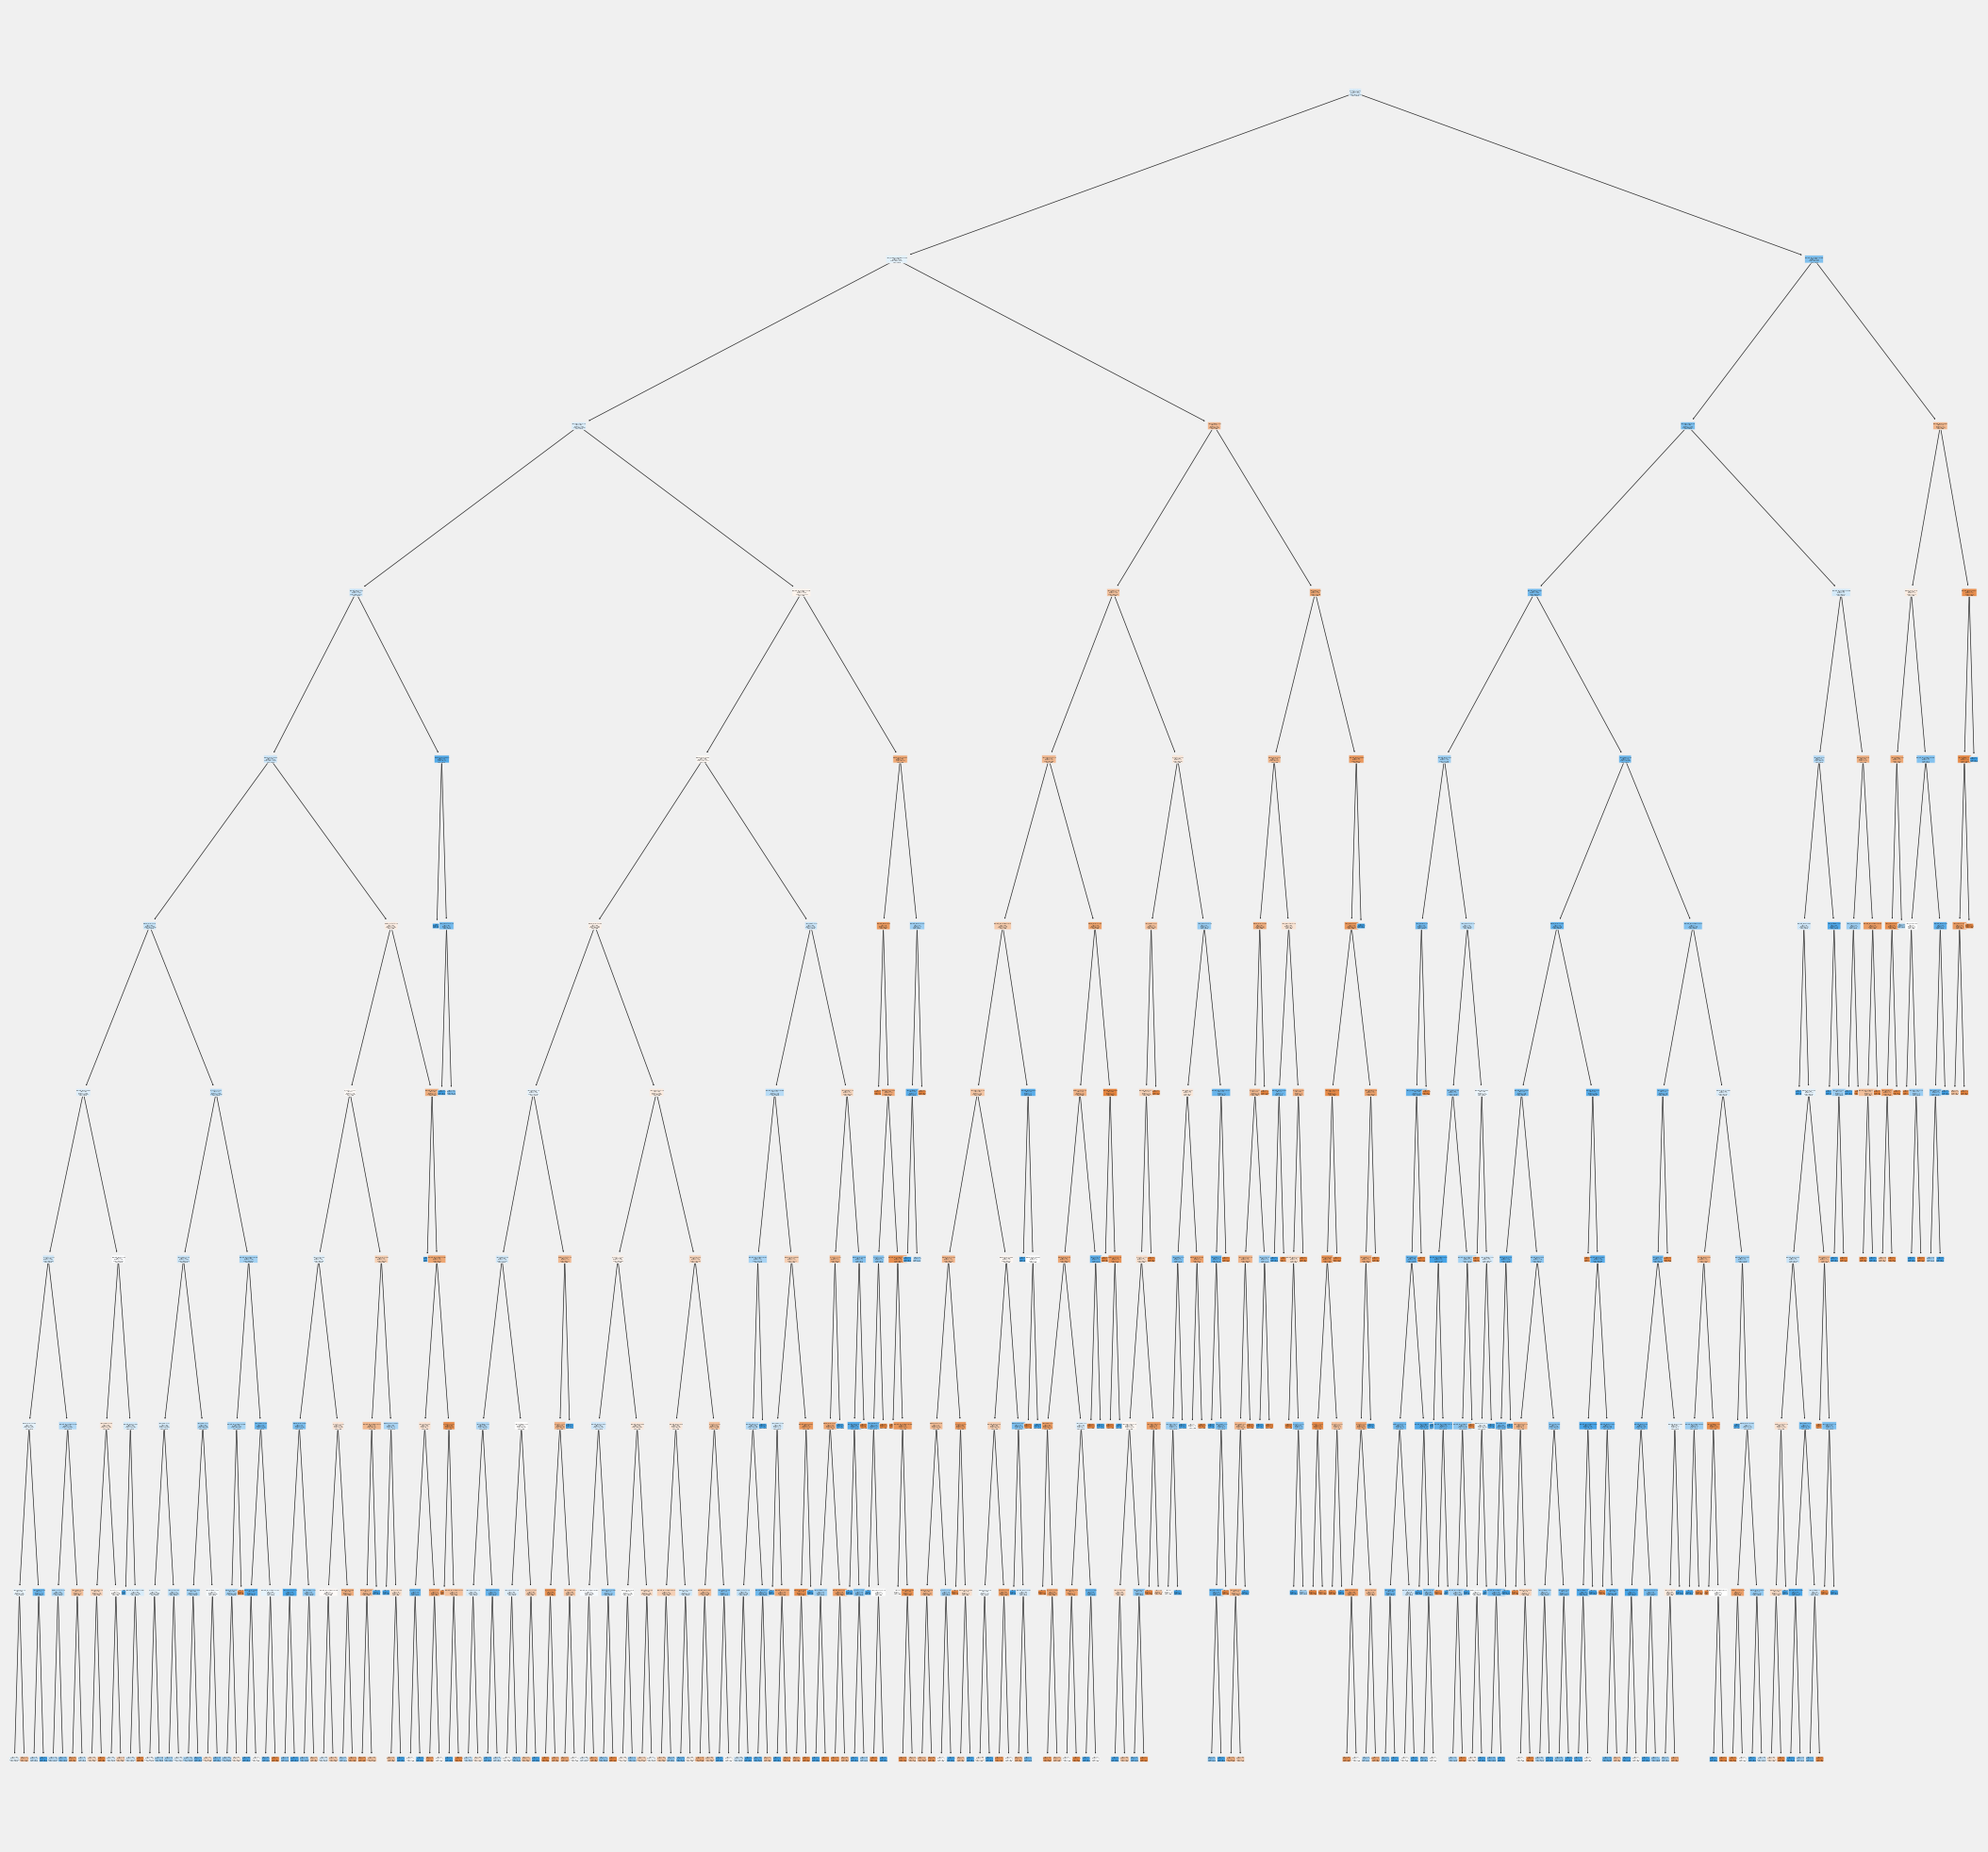

In [14]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.651529485966572

TPR Train :	 0.8347401988369911
TNR Train :	 0.4179818268770923

FPR Train :	 0.5820181731229077
FNR Train :	 0.1652598011630088

Precision:	 0.6648915937618867
Recall   :	 0.4179818268770923
F1-score :	 0.5132873293202173


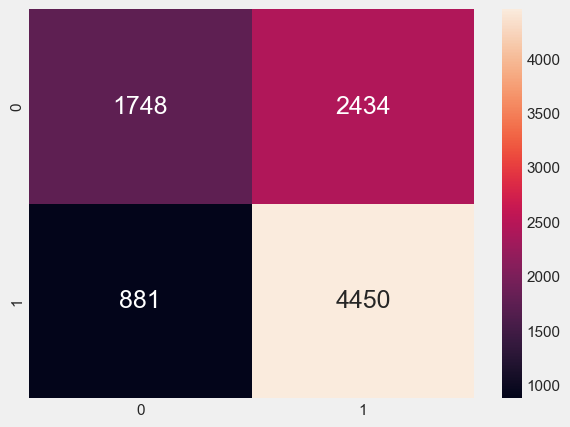

In [15]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6004415011037527

TPR Test :	 0.7904461469130238
TNR Test :	 0.37351991388589884

FPR Test :	 0.6264800861141012
FNR Test :	 0.2095538530869761

Precision:	 0.6648915937618867
Recall   :	 0.4179818268770923
F1-score :	 0.5132873293202173


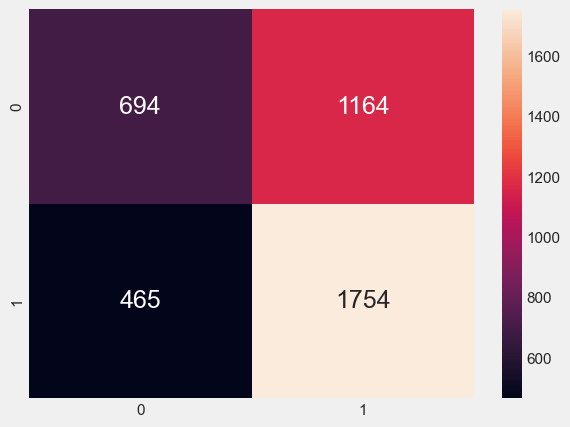

In [16]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

# Decision Tree - Balanced Sampling

In [17]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


[Text(0.6895629584352079, 0.9545454545454546, 'K_cluster_3 <= 0.5\ngini = 0.5\nsamples = 10570\nvalue = [5330, 5240]\nclass = bad'),
 Text(0.4702017114914425, 0.8636363636363636, 'genre_Massively Multiplayer <= 0.5\ngini = 0.498\nsamples = 9337\nvalue = [4947, 4390]\nclass = bad'),
 Text(0.3065403422982885, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.5\nsamples = 8734\nvalue = [4478, 4256]\nclass = bad'),
 Text(0.16633557457212714, 0.6818181818181818, 'K_cluster_0 <= 0.5\ngini = 0.5\nsamples = 6323\nvalue = [3080, 3243]\nclass = good'),
 Text(0.10757946210268948, 0.5909090909090909, 'original_price <= 262.18\ngini = 0.5\nsamples = 4187\nvalue = [2137, 2050]\nclass = bad'),
 Text(0.0745721271393643, 0.5, 'original_price <= 27.94\ngini = 0.5\nsamples = 4133\nvalue = [2123, 2010]\nclass = bad'),
 Text(0.039119804400977995, 0.4090909090909091, 'genre_Casual <= 0.5\ngini = 0.5\nsamples = 3776\nvalue = [1903, 1873]\nclass = bad'),
 Text(0.019559902200488997, 0.3181818181818182, 'g

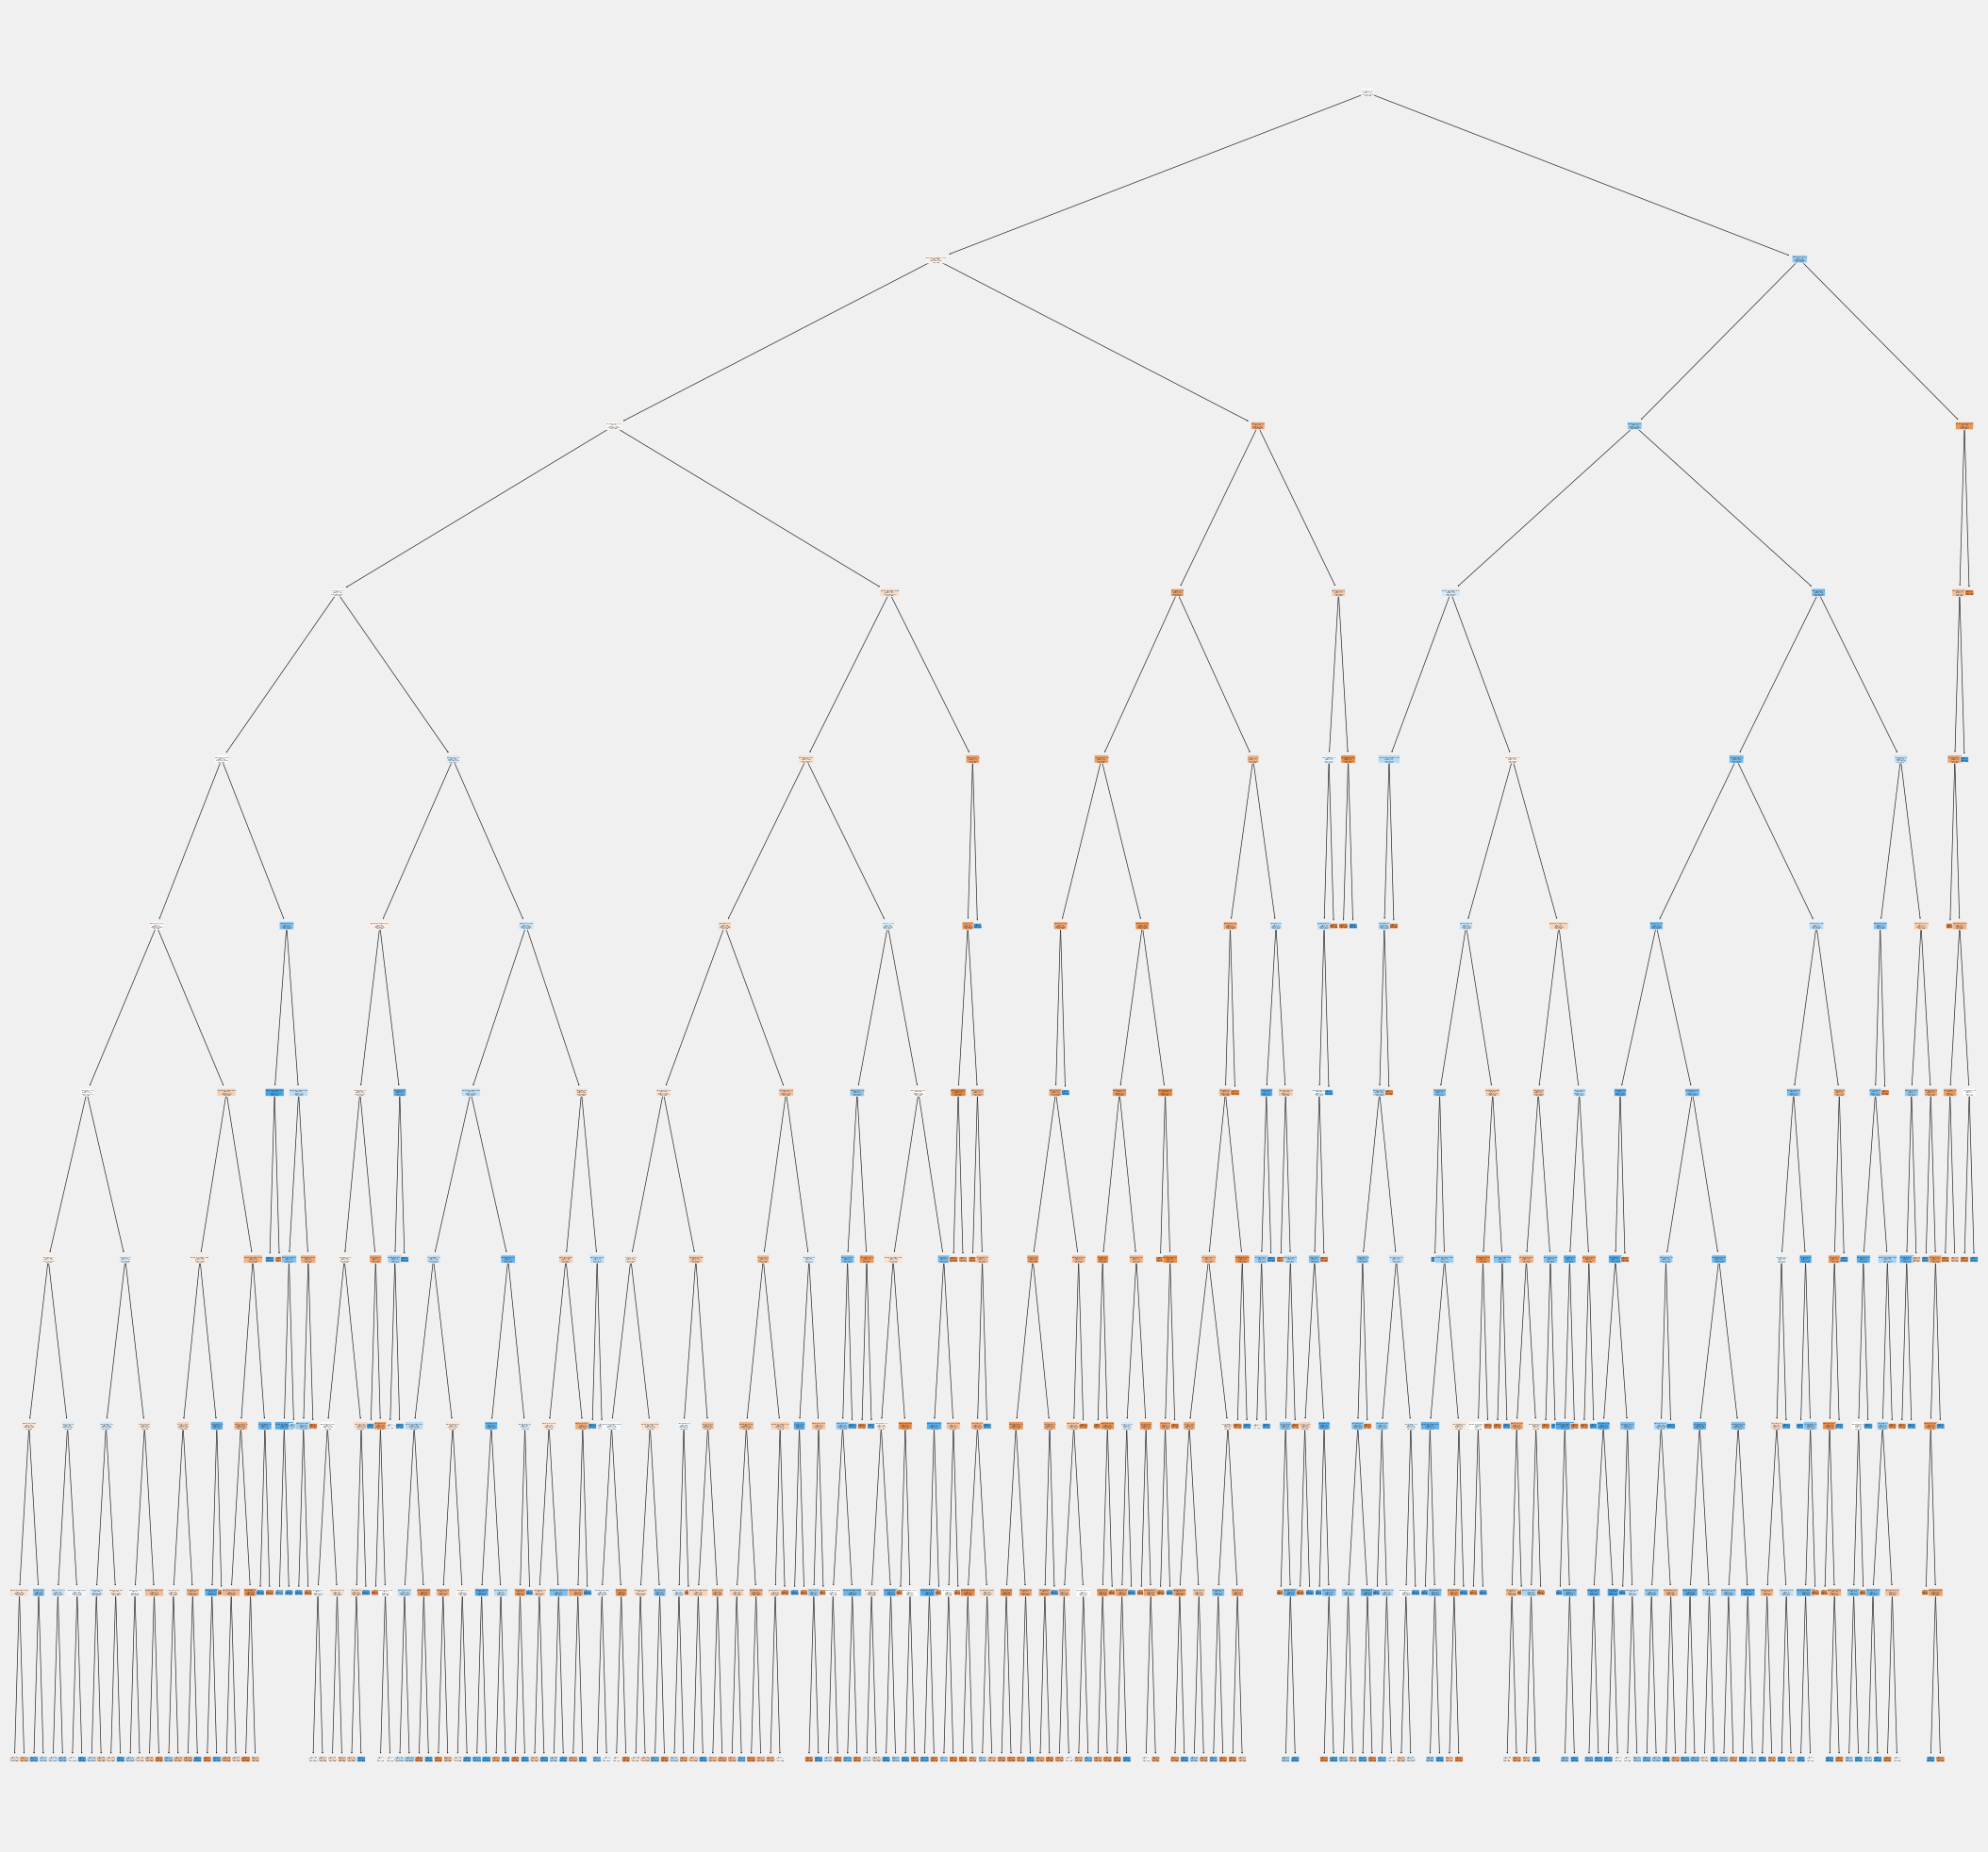

In [18]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6483443708609271

TPR Train :	 0.6213740458015267
TNR Train :	 0.674859287054409

FPR Train :	 0.325140712945591
FNR Train :	 0.3786259541984733

Precision:	 0.6445081526608135
Recall   :	 0.674859287054409
F1-score :	 0.6593346164421225


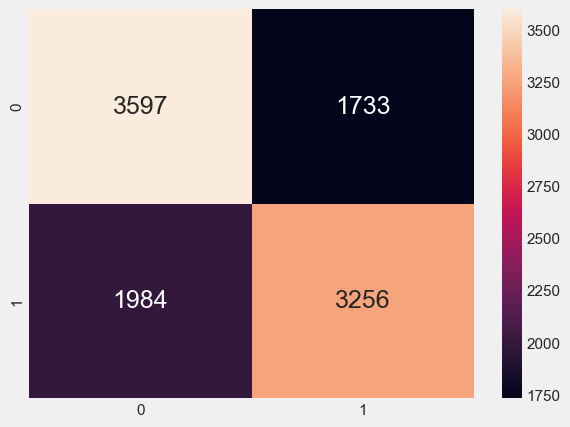

In [19]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6061810154525387

TPR Test :	 0.5593073593073593
TNR Test :	 0.6549549549549549

FPR Test :	 0.345045045045045
FNR Test :	 0.4406926406926407

Precision:	 0.6445081526608135
Recall   :	 0.674859287054409
F1-score :	 0.6593346164421225


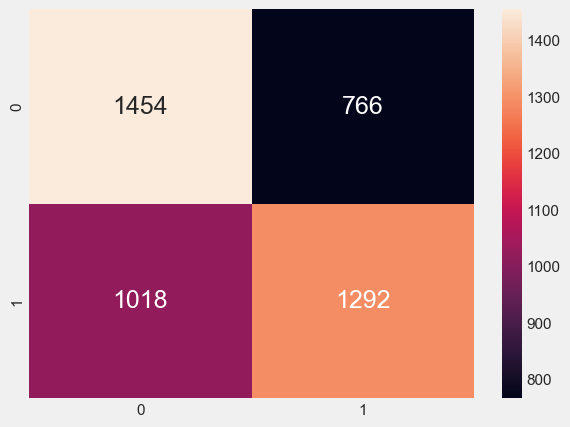

In [20]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])